#Dataset Information
  \\
The data set contains 3 classes of 50 instances each, where each class refers  to a type of iris plant.

Attribute Information: \\

sepal length in cm \\
sepal width in cm \\
petal length in cm \\
petal width in cm  \\
class:  \\
Iris Setosa -- Iris Versicolour -- Iris Virginica

#Import modules

In [1]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#Loading the dataset

In [2]:
data = pd.read_csv('iris.csv')
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]
data.head()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#Visualization by graph

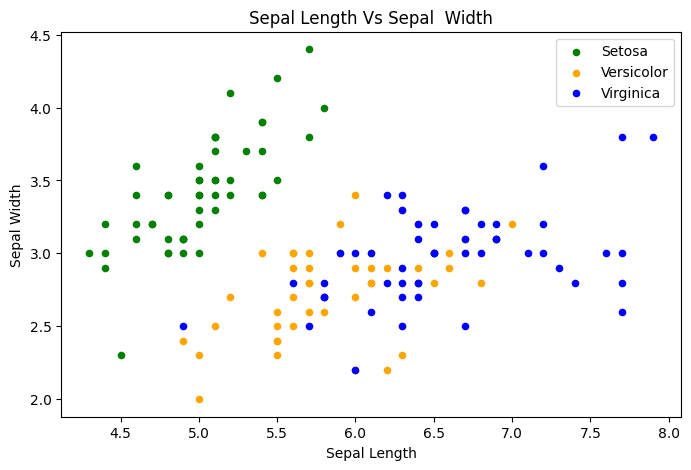

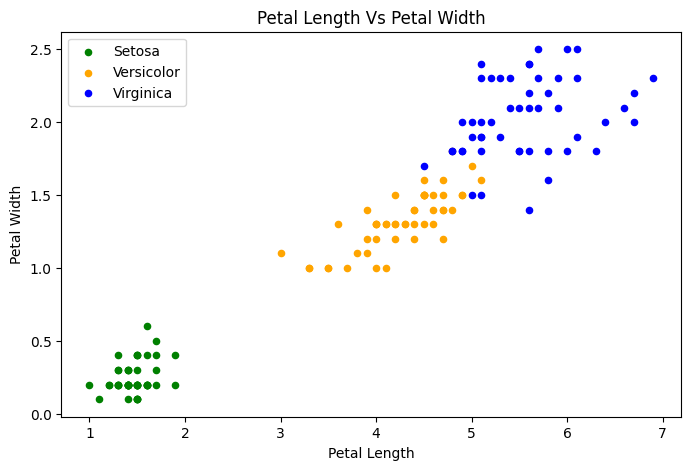

<Figure size 640x480 with 0 Axes>

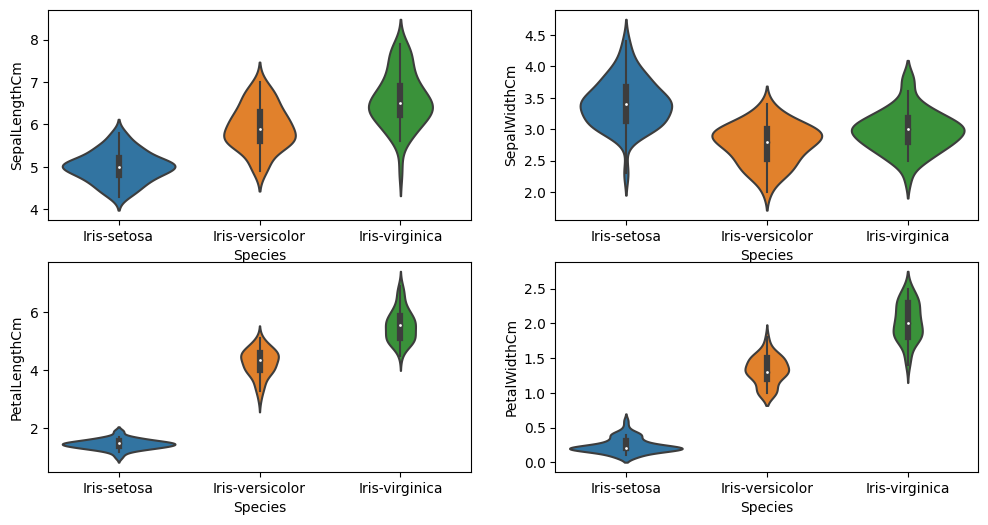

In [3]:

fig = data[data.Species == 'Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='green', label='Setosa')
data[data.Species == 'Iris-versicolor'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='orange', label='Versicolor', ax=fig)
data[data.Species == 'Iris-virginica'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='blue', label='Virginica', ax=fig)

fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length Vs Sepal  Width')

fig=plt.gcf()
fig.set_size_inches(8, 5)
plt.show()


fig = data[data.Species == 'Iris-setosa'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='green', label='Setosa')
data[data.Species == 'Iris-versicolor'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='orange', label='Versicolor', ax=fig)
data[data.Species == 'Iris-virginica'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='blue', label='Virginica', ax=fig)

fig.set_xlabel('Petal Length')
fig.set_ylabel('Petal Width')
fig.set_title('Petal Length Vs Petal Width')

fig=plt.gcf()
fig.set_size_inches(8, 5)
plt.show()
plt.savefig('Petal_LengthVsWidth.jpeg')



#violinplot

plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.violinplot(x='Species', y = 'SepalLengthCm', data=data)
plt.subplot(2,2,2)
sns.violinplot(x='Species', y = 'SepalWidthCm', data=data)

plt.subplot(2,2,3)
sns.violinplot(x='Species', y = 'PetalLengthCm', data=data)
plt.subplot(2,2,4)
sns.violinplot(x='Species', y = 'PetalWidthCm', data=data)
# plt.savefig('violionplot.jpeg')
plt.show()

Split the dataset into training and testing sets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)


#Train a logistic regression model

In [5]:
Linear_model = LogisticRegression(max_iter=10000)
Linear_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

# Make predictions on the testing set

In [6]:
y_pred = Linear_model.predict(X_test)

# Generate a confusion matrix


In [7]:
cm = confusion_matrix(y_test, y_pred)
acc=accuracy_score(y_pred,y_test)
print("Accuracy score : ",acc)

Accuracy score :  1.0


 # Visualize the confusion matrix


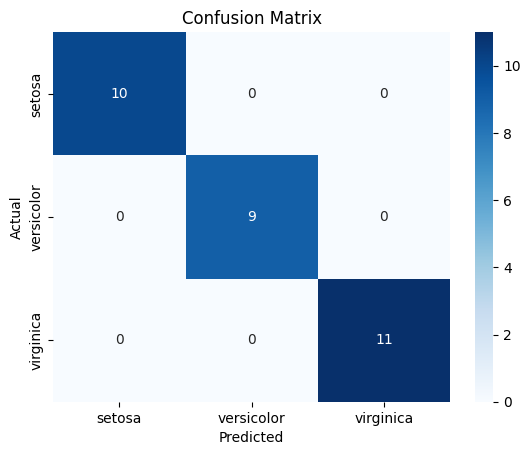

In [8]:

target_names=['setosa','versicolor','virginica']
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['setosa','versicolor','virginica'], yticklabels=['setosa','versicolor','virginica'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()